In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load dataset
df = pd.read_csv('C:/Users/AHVINAV/ML-Python/Regression/House_Price.csv')

# 3. Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

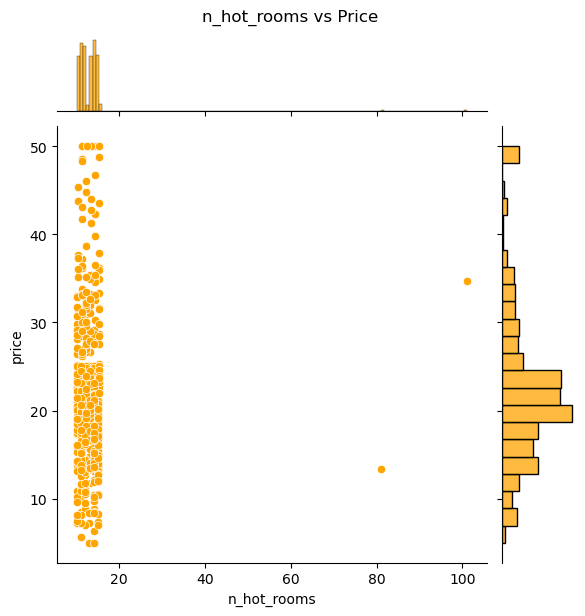

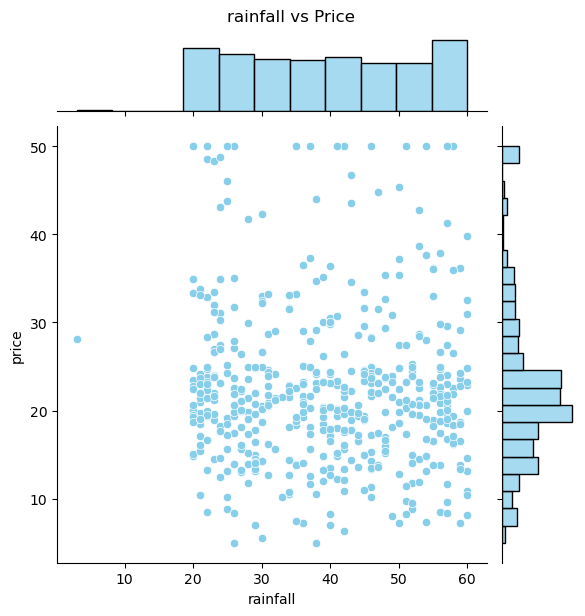

C:\Users\AHVINAV\AppData\Local\Temp\ipykernel_2436\2702244352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airport', data=df, palette='viridis')


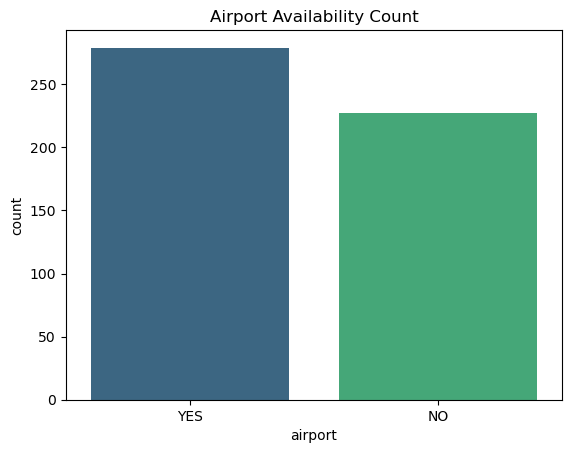

C:\Users\AHVINAV\AppData\Local\Temp\ipykernel_2436\2702244352.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='waterbody', data=df, palette='coolwarm')


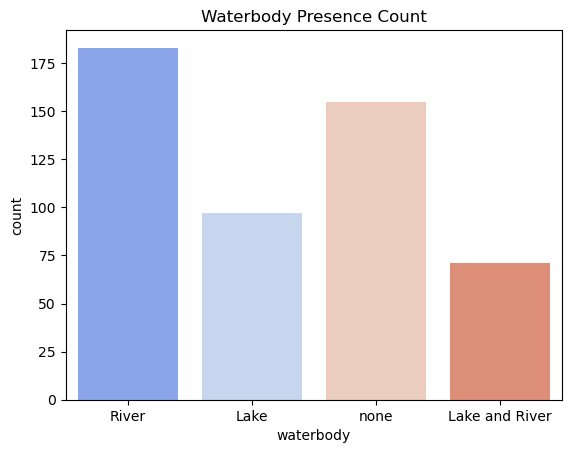

C:\Users\AHVINAV\AppData\Local\Temp\ipykernel_2436\2702244352.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bus_ter', data=df, palette='pastel')


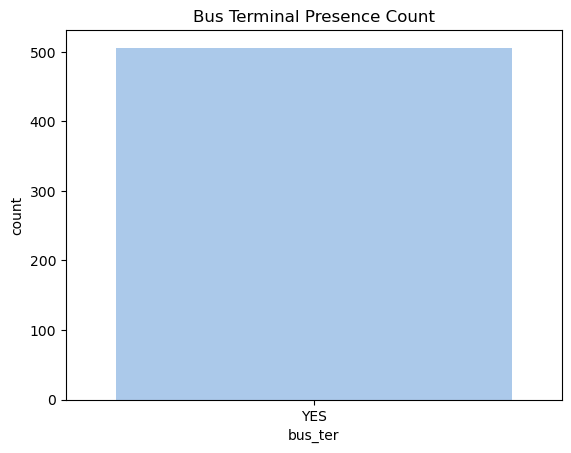

In [2]:
# Jointplot for n_hot_rooms vs Price
sns.jointplot(x='n_hot_rooms', y='price', data=df, kind='scatter', color='orange')
plt.suptitle("n_hot_rooms vs Price", y=1.02)
plt.show()

# Jointplot for rainfall vs Price
sns.jointplot(x='rainfall', y='price', data=df, kind='scatter', color='skyblue')
plt.suptitle("rainfall vs Price", y=1.02)
plt.show()

# Countplot for Airport
sns.countplot(x='airport', data=df, palette='viridis')
plt.title('Airport Availability Count')
plt.show()

# Countplot for Waterbody
sns.countplot(x='waterbody', data=df, palette='coolwarm')
plt.title('Waterbody Presence Count')
plt.show()

# Countplot for Bus Terminal
sns.countplot(x='bus_ter', data=df, palette='pastel')
plt.title('Bus Terminal Presence Count')
plt.show()

### Observations

- ✅ Missing Values found in `n_hos_beds` (handled using mean imputation).
- ⚠️ `crime_rate` shows skewness and possible outliers.
- ⚠️ Outliers detected in `n_hot_rooms` (extremely high values) and `rainfall` (extremely low values) — handled via capping/flooring.
- ℹ️ `bus_ter` contains only one unique value ('YES'), hence it was dropped as it does not add variability or value.


In [3]:
# 4. Handle Missing Values
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mean())

# 5. Handle Outliers
cap_hot_rooms = df['n_hot_rooms'].quantile(0.99)
df.loc[df['n_hot_rooms'] > cap_hot_rooms, 'n_hot_rooms'] = cap_hot_rooms

floor_rainfall = df['rainfall'].quantile(0.01)
df.loc[df['rainfall'] < floor_rainfall, 'rainfall'] = floor_rainfall

# 6. Feature Engineering
df['avg_dist'] = (df['dist1'] + df['dist2'] + df['dist3'] + df['dist4']) / 4
df.drop(['dist1', 'dist2', 'dist3', 'dist4', 'bus_ter'], axis=1, inplace=True)

# 7. Encoding categorical variables (corrected)
cols_to_encode = ['airport', 'waterbody', 'parks']
cols_to_encode = [col for col in cols_to_encode if col in df.columns]
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

print(df.head())

   price  crime_rate  resid_area  air_qual  room_num   age  teachers  \
0   24.0     0.00632       32.31     0.538     6.575  65.2      24.7   
1   21.6     0.02731       37.07     0.469     6.421  78.9      22.2   
2   34.7     0.02729       37.07     0.469     7.185  61.1      22.2   
3   33.4     0.03237       32.18     0.458     6.998  45.8      21.3   
4   36.2     0.06905       32.18     0.458     7.147  54.2      21.3   

   poor_prop  n_hos_beds  n_hot_rooms  ...  parks_0.079946625  \
0       4.98       5.480     11.19200  ...              False   
1       9.14       7.332     12.17280  ...              False   
2       4.03       7.394     15.39952  ...              False   
3       2.94       9.268     11.26720  ...              False   
4       5.33       8.824     11.28960  ...              False   

   parks_0.08028456  parks_0.080515947  parks_0.080678048  parks_0.083032787  \
0             False              False              False              False   
1             Fa

In [4]:
# 8. Define Features & Target
X = df.drop('price', axis=1)
y = df['price']

# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 10. Build Models
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


Model Evaluation Metrics:
Linear Regression -> MSE: 24.26, RMSE: 4.92, R2: 0.676
Ridge Regression  -> MSE: 24.52, RMSE: 4.95, R2: 0.673
Lasso Regression  -> MSE: 25.08, RMSE: 5.01, R2: 0.665

Model Comparison Table:
               Model        MSE      RMSE  R2 Score
0  Linear Regression  24.255048  4.924941  0.676036
1   Ridge Regression  24.517437  4.951509  0.672532
2   Lasso Regression  25.084775  5.008470  0.664954


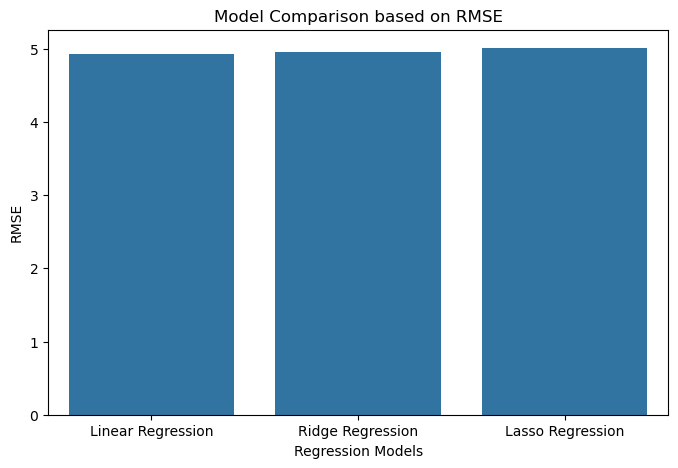

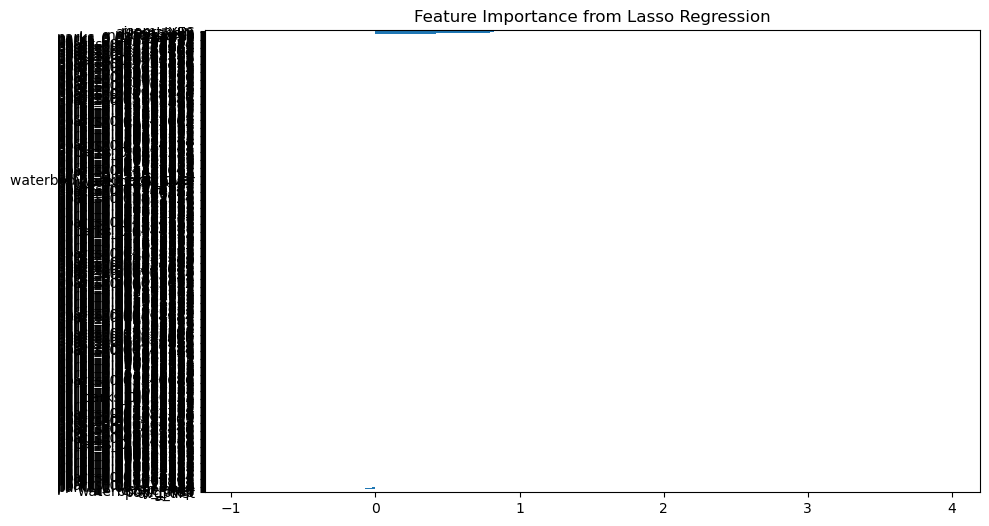

In [5]:
# 11. Evaluate Models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)

# 12. Print Evaluation Metrics
print("\nModel Evaluation Metrics:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.3f}")
print(f"Ridge Regression  -> MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R2: {r2_ridge:.3f}")
print(f"Lasso Regression  -> MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R2: {r2_lasso:.3f}")

# 13. Comparison Table
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_lr, mse_ridge, mse_lasso],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso]
})

print("\nModel Comparison Table:")
print(results_df)

# 14. RMSE Comparison Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model Comparison based on RMSE')
plt.ylabel('RMSE')
plt.xlabel('Regression Models')
plt.show()

# 15. Lasso Feature Importance
coef = pd.Series(lasso.coef_, index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(10, 6))
imp_coef.plot(kind='barh')
plt.title("Feature Importance from Lasso Regression")
plt.show()